### Computer Programming Final Assignment

---

## Fifteen Years of Women's Tennis

In honor of Emma Raducanu's historical achievements this year, we will study the results of womens' tennis matches over the period 2007-2021. Your objectives are to parse the data, reconstruct tournament brackets, identify the top players, and implement an algorithm to provide an alternative ranking for the players.

**NOTE: You are only allowed to use fundamental Python data types (lists, tuples, dictionaries, numpy.ndarray, etc.) to complete this assignment.** You are not allowed to use advanced data querying and data analysis packages such as pandas, sqlite, networkx, or similar. 

### Data

The repository contains fifteen `.csv` files with match results, one file for each year. Each file contains the following variables:

* Tournament – the name of the tournament that the match was part of.
* Start date – the date when the tournament starts.
* End date – the date when the tournament ends.
* Best of – 3 means that first player to win 2 sets wins match (all WTA matches are best of 3 sets).
* Player 1, Player 2 – names of the players in the match.
* Rank 1, Rank 2 – WTA ranks of Player 1 and Player 2 before the start of the tournament. Not all players will have a ranking.
* Set 1-3 – result for each set played where the score is shown as: number of games won by Player 1 - number of games won by Player 2. The player that wins the most games in a set wins that set.
* Comment
  * Completed means match was played.
  * Player retired means that the named player withdrew and the other player won by default.

### 1. Reconstructing the tournaments

Tournaments in tennis are typically in knockout format. In each round there are several pairs of fixtures, the winners of each match advance to the next round and the losers are eliminated. The winners then proceed to the next round and the process continues until two players contest the final. Typically, the rounds in the competition go as follows: \[`First Round`, `Second Round`, ...,\] `Quarterfinals`, `Semifinals`, `Final`.

In some cases, tournaments have a `Round Robin` (also known as all-play-all) group stage, meaning that each player in a group plays against each other player in turn. There are usually two parallel groups with 4 players in each. The top player(s) (i.e. those who won the most matches) in each group advance to a short knockout stage (typically just Semifinals and Final). These tournaments are:

* Sony Ericsson Championships 2007-2015
* Commonwealth Bank Tournament of Champions 2009
* Qatar Airways Tournament of Champions Sofia 2012
* Garanti Koza WTA Tournament of Champions 2013-2014
* BNP Paribas WTA Finals 2016-2018
* WTA Elite Trophy 2015-2019
* WTA Finals 2019, 2021

Very occasionally, tournaments also include a `Third Place` match too.

Your task is to identify the winner in each match and the round in which the match was played. To check your work, please call the procedures you have writen to print the answers to the following questions:

* Who won the final of the 2021 Women's US Open?
* Who played against whom in the 4th Round of the 2018 French Open? 
* In which round was Venus Williams eliminated in the 2011 Australian Open?
* How many finals has Naomi Osaka played in until now?
* How many times have Venus and Serena Williams played against each other and how many of these matches each won?

### 2. Winners win

One simple and naive way to rank players is to count how many matches they won each year. Write a procedure that estimates this. Then print the three top ranked players for the year 2021 and for the period 2007-2021, together with the total number of matches they won. Higher scores are better, so ranking is the reversed order of most matches won.


### 3. Winners don't lose

A more sophisticated ranking algorithm will account for the fact that some players may play fewer games (e.g., due to an injury) and that wins in later stages of a tournament (e.g., in the final and semi-final compared to earlier rounds of the competition) are more important. Write another procedure that estimates a player's rank by adding `r` points for every win and subtracting `1/r` for every loss, where `r = 1` for the lowest elimination round of the tournament, `r = 2` for the next round of the tournament, and so on. In other words, `r` starts at 1 and increases for every next elimination round. This way, winning larger competitions brings more points (they have more elimination rounds), wins in later rounds improve one's rank more, and losses in earlier rounds diminish one's rank more. For round-robin stage matches, assume that `r = 1`. 

Use this measure to print the three top ranked players for the year 2021 and for the period 2007-2021, together with their scores.


### 4. Winners beat other winners (WbW)

Another idea for ranking players is that winning over better players should count more. However, how we measure a good player depends on whether they beat other good players, so we get into a recursive situation. Do not worry, you will not have to write a recursive procedure here as every recursive solution can be rewritten as iteration! This is what we will do:

1. First, count all the players in the given data and assign each a score of 1/n, where n is the number of unique players.

2. Then, repeatedly do the following sequence of steps:
    1. Each player divides its current score equally among all the matches they have lost and passes these shares onto the players they lost to. If the player never lost, then they pass their current score to themselves. If the player lost two times to a specific individual, then they pass two shares to that individual.   
    2. Each player updates their score to be the sum of the shares they receive.    
    3. Rescale the score of each player by multiplying it by 0.85 and adding 0.15/n.
    
3. Repeat the procedure until adjustments are too small to matter. You may need to come up with modifications of the algorithm or the data if the algorithm cannot converge or produces non-sensical results in specific situations.

This algorithm essentially starts with a world in which everyone is equally important and then starts to "pass importance" iteratively to the winners until an equilibrium is reached.

Use this measure, which we will call WbW, to print the three top ranked players for the year 2021 and for the period 2007-2021, together with their scores. 


### 5. Compare your WbW ranking measure

In fact, the data already contain the players' official WTA rank in the variables Rank1 and Rank2, which follows its own [complex procedure](https://en.wikipedia.org/wiki/WTA_Rankings). How well does your WbW ranking correlate with the WTA ranking over time? 

Use the data from 2007 to estimate the players' WbW ranking at the end of this year. This will give you sufficient data to initialize your estimate. 

Then, starting with 2008, update your ranking before the start of each tournament, based only on results from tournaments completed in the previous 52 weeks. Use a scatter plot from `matplotlib` to plot the players' WTA ranking on the x-axis against your WbW ranking calculated before the start of the same tournament on the y-axis. If an individual's WTA ranking changes mid-tournament (rare), take their first listed ranking within that tournament. Each point on the plot should be a player's ranking before the start of each tournament for each tournament they participated in from 2008 until now. So the number of points to plot will be the number of unique individuals that took part in each tournament for all tournaments during that period.

Write a couple of sentences to note what you observe. You will not be marked for your observations but some reflection is important as it could help you identify problems with your code, for example.


## Import and run your code here

Keep your code in separate `.py` files and then import it in the code cell below. Then call the functions/methods you need to conduct the analysis described above and print the requested outputs. We should be able to run the cell below to calculate again the results and get the requested output, without having to modify your code in any way. 

In [17]:
# Import modules to estimate and show results
import tennisdata as td
import reconstructingtournaments as rt
import winnerswin as ww
import winnersdontlose as wdl
import winnersbeatwinners as wbw
from matplotlib import pyplot as plt

In [18]:
#Hard code start and years
start = 2007
years = 15

#Store Data
data, players = td.store_data(start, years)

In [19]:
#Reconstruct Tournaments
for year in data:
    for tournament in data[year]:
        rt.get_rounds(data, year, tournament)

uso21 = rt.tourn_winner(data, 2021, 'US Open')
print(f"{uso21} won the 2021 Women's US Open")

fo18 = rt.round_matchups(data, 2018, 'French Open', 4)
print(f'\nMatchups, Round 4 of the 2018 French Open: {fo18}')

vw_ao11 = rt.round_elim(data, 2011, 'Australian Open', 'Williams V.')
print(f'\nVenus Williams was eliminated in Round {vw_ao11} of the 2011 Australian Open')

osaka = rt.player_finals(data, 'Osaka N.')
print(f'\nNaomi Osaka has played in {osaka} finals')

williams = rt.headtohead(data, 'Williams V.', 'Williams S.')
print(f'\nVenus and Serena Williams have played against each other {williams[0]} times since 2007.')
print(f"Venus has won {williams[1]['Williams V.']} matches, Serena has won {williams[1]['Williams S.']} matches.")

Raducanu E. won the 2021 Women's US Open

Matchups, Round 4 of the 2018 French Open: ['Buzarnescu M. vs Keys M.', 'Strycova B. vs Putintseva Y.', 'Stephens S. vs Kontaveit A.', 'Mertens E. vs Halep S.', 'Kasatkina D. vs Wozniacki C.', 'Kerber A. vs Garcia C.', 'Williams S. vs Sharapova M.', 'Tsurenko L. vs Muguruza G.']

Venus Williams was eliminated in Round 3 of the 2011 Australian Open

Naomi Osaka has played in 10 finals

Venus and Serena Williams have played against each other 18 times since 2007.
Venus has won 6 matches, Serena has won 12 matches.


In [4]:
#Winners Win
winners_2021 = ww.wins_ranking(data, players, 2021, 2021)
winners_alltime = ww.wins_ranking(data, players, 2007, 2021)

print('Winners Win 2021: Top 3')
print(f'1. {winners_2021[0][0]} with {winners_2021[0][1]} wins')
print(f'2. {winners_2021[1][0]} with {winners_2021[1][1]} wins')
print(f'3. {winners_2021[2][0]} with {winners_2021[2][1]} wins')

print('\nWinners Win 2007-2021: Top 3')
print(f'1. {winners_alltime[0][0]} with {winners_alltime[0][1]} wins')
print(f'2. {winners_alltime[1][0]} with {winners_alltime[1][1]} wins')
print(f'3. {winners_alltime[2][0]} with {winners_alltime[2][1]} wins')

Winners Win 2021: Top 3
1. Kontaveit A. with 49 wins
2. Jabeur O. with 48 wins
3. Sabalenka A. with 44 wins

Winners Win 2007-2021: Top 3
1. Wozniacki C. with 591 wins
2. Williams S. with 514 wins
3. Radwanska A. with 501 wins


In [5]:
#Winners Don't Lose
wdl_2021 = wdl.wdl_rank(data, players, 2021, 2021)
wdl_alltime = wdl.wdl_rank(data, players, 2007, 2021)

print("\nWinners Don't Lose 2021: Top 3")
print(f'1. {wdl_2021[0][0]} with score: {wdl_2021[0][1]}')
print(f'2. {wdl_2021[1][0]} with score: {wdl_2021[1][1]}')
print(f'3. {wdl_2021[2][0]} with score: {wdl_2021[2][1]}')

print("\nWinners Don't Lose 2007-2021: Top 3")
print(f'1. {wdl_alltime[0][0]} with score: {wdl_alltime[0][1]}')
print(f'2. {wdl_alltime[1][0]} with score: {wdl_alltime[1][1]}')
print(f'3. {wdl_alltime[2][0]} with score: {wdl_alltime[2][1]}')


Winners Don't Lose 2021: Top 3
1. Barty A. with score: 144.79999999999998
2. Sabalenka A. with score: 115.23333333333333
3. Jabeur O. with score: 105.31666666666665

Winners Don't Lose 2007-2021: Top 3
1. Williams S. with score: 1622.5380952380951
2. Wozniacki C. with score: 1387.3523809523808
3. Azarenka V. with score: 1152.4619047619049


In [6]:
#Winners Beat Other Winners
wbw_2021 = wbw.wbw_rank(data, players, 2021, 2021)
wbw_alltime = wbw.wbw_rank(data, players, 2007, 2021)

print("\nWinners Beat Other Winners 2021: Top 3")
print(f'1. {wbw_2021[0][0]} with score: {wbw_2021[0][1]}')
print(f'2. {wbw_2021[1][0]} with score: {wbw_2021[1][1]}')
print(f'3. {wbw_2021[2][0]} with score: {wbw_2021[2][1]}')

print("\nWinners Beat Other Winners 2007-2021: Top 3")
print(f'1. {wbw_alltime[0][0]} with score: {wbw_alltime[0][1]}')
print(f'2. {wbw_alltime[1][0]} with score: {wbw_alltime[1][1]}')
print(f'3. {wbw_alltime[2][0]} with score: {wbw_alltime[2][1]}')


Winners Beat Other Winners 2021: Top 3
1. Sabalenka A. with score: 0.024374720474620235
2. Barty A. with score: 0.02407701575679993
3. Muguruza G. with score: 0.022364927819627532

Winners Beat Other Winners 2007-2021: Top 3
1. Williams S. with score: 0.016164749568981927
2. Wozniacki C. with score: 0.014693129564504106
3. Azarenka V. with score: 0.01342606993095955


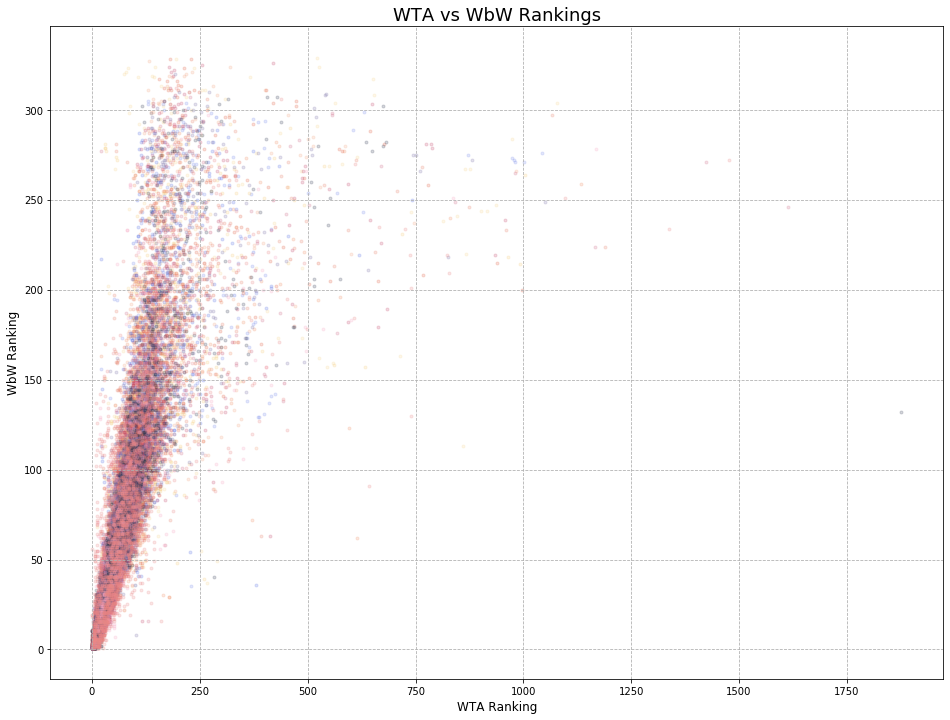

In [7]:
#Data prep: repair tournaments which span year end
data_fye = td.fix_year_ends(data)

#Plot WbW vs WTA Rankings
plt.figure(figsize=(16,12))
plt.title('WTA vs WbW Rankings', fontsize=18)
plt.xlabel('WTA Ranking', fontsize=12)
plt.ylabel('WbW Ranking', fontsize=12)
plt.grid(linestyle='dashed')
colors = ['#f3a683', '#f7d794', '#778beb', '#e77f67', '#cf6a87', '#f19066', '#f5cd79', '#546de5', '#e15f41', '#c44569', '#786fa6', '#303952', '#f8a5c2', '#ea8685', '#596275']

for i, year in enumerate(range(2008, 2022)):
    for tournament in data_fye[year]:
        rankings = wbw.wbw_wta_rank_ytd(data_fye, year, tournament)
        wbws, wtas = zip(*rankings.values())
        labels = rankings.keys() 
        plt.scatter(wtas, wbws, marker=".", alpha=0.2, color = colors[i]);

#Source: https://stackoverflow.com/questions/30013511/python-plot-a-graph-from-values-inside-dictionary/30013971 User: tmthydvnprt


### Analysis
There is a clear positive relationship between WTA and WbW rankings. The relationship appears to be strongest close to the origin. This would, in real-world terms, indicate that both algorithms broadly agree on which players rank best. The relationship gets progressively weaker further from the origin; visually, the points disperse. Further, the range of WTA rankings present in the data set is much larger than the range of WbW rankings.